In [1]:
import warnings
warnings.filterwarnings('ignore')
from autoencoders import *
from pdb_utils import *
import pickle
import numpy as np
import pandas as pd
import random

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [2]:
import seaborn as sns; sns.set(color_codes=True)

import matplotlib
import matplotlib.pyplot as plt

In [3]:
with open('pickle files/label_dict.pkl', 'rb') as f:
    label_dict = pickle.load(f)

In [33]:
with open('pickle files/pdb_groups.pkl', 'rb') as f:
    pdbgroups = pickle.load(f)

In [38]:
fold_dict = {}

for family, pdbs in pdbgroups.items():
    fold = ".".join(family.split(".")[:2])
    fold_dict.setdefault(fold, [])
    new = fold_dict[fold] + pdbs
    fold_dict[fold] = new

In [57]:
selected_folds = filter(lambda x: x[1]==12, map(lambda x: (x[0],len(x[1])), fold_dict.items()))

In [59]:
structures = []

for fold,_ in selected_folds:
    for pdb in fold_dict[fold]:
        pdb_path = os.path.join("PDBs", pdb+".pdb")
        parser = PDB.PDBParser()
        structure = parser.get_structure(pdb, pdb_path)
        structures.append(structure)

In [61]:
matrixdict_s1 = DistanceMatrixDict(structures, resize_strategy="strategy1", resize_to=(64,64),removeSymmetry=True)

In [62]:
print "NUMBER OF PROTEINS: {}".format(len(matrixdict_s1.keys()))
print "PROTEINS VECTOR SIZE: {}".format(len(matrixdict_s1.values()[0]))

NUMBER OF PROTEINS: 192
PROTEINS VECTOR SIZE: 2016


In [63]:
X_train, y_train = [],[]

for protein,vector in matrixdict_s1.items():
    X_train.append(vector)
    y_train.append(label_dict[protein])
protein_names = matrixdict_s1.keys()

In [65]:
print "NUMBER OF FOLDS: {}".format(len(selected_folds))
print "NUMBER OF FAMILIES: {}".format(len(set(y_train)))

NUMBER OF FOLDS: 16
NUMBER OF FAMILIES: 61


## HEATMAP USING STRATEGY 1

In [66]:
input_size = len(X_train[0])
new_features, loss = LinearAutoencoder(X_train, input_size, 50, 100, learning_rate=0.0001)

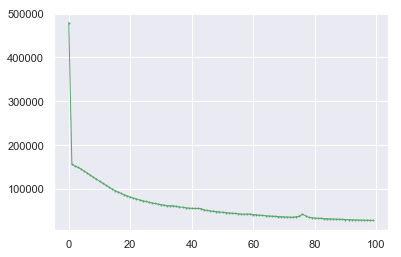

In [67]:
# LOSS GRAPH
fig, ax = plt.subplots()
ax.plot(range(0,len(loss)), loss, 'go-', linewidth=1, markersize=1)

In [68]:
df = pd.DataFrame(new_features, index =y_train)

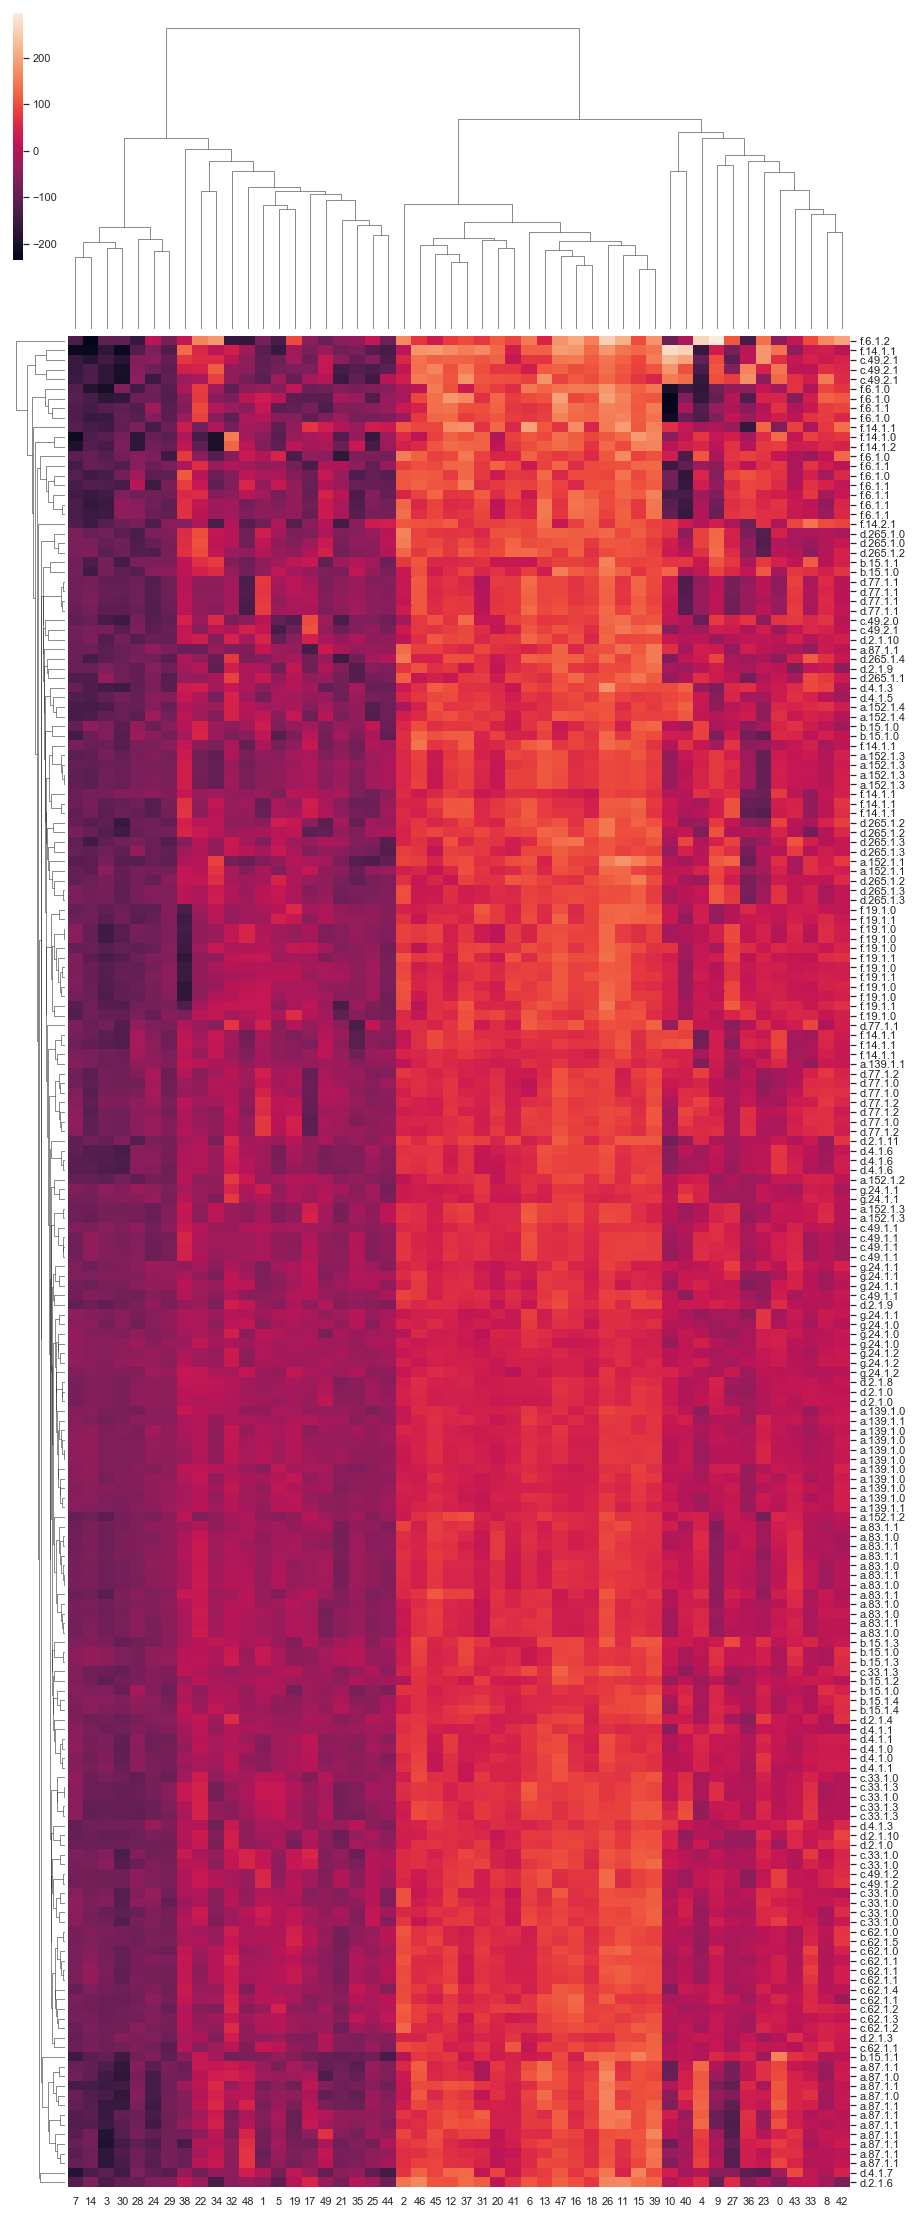

In [71]:
g = sns.clustermap(df, yticklabels=True, figsize=(15, 40))

#### PCA is used to decrease feature dimension (n=4)

In [72]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
features2d = pca.fit_transform(new_features)

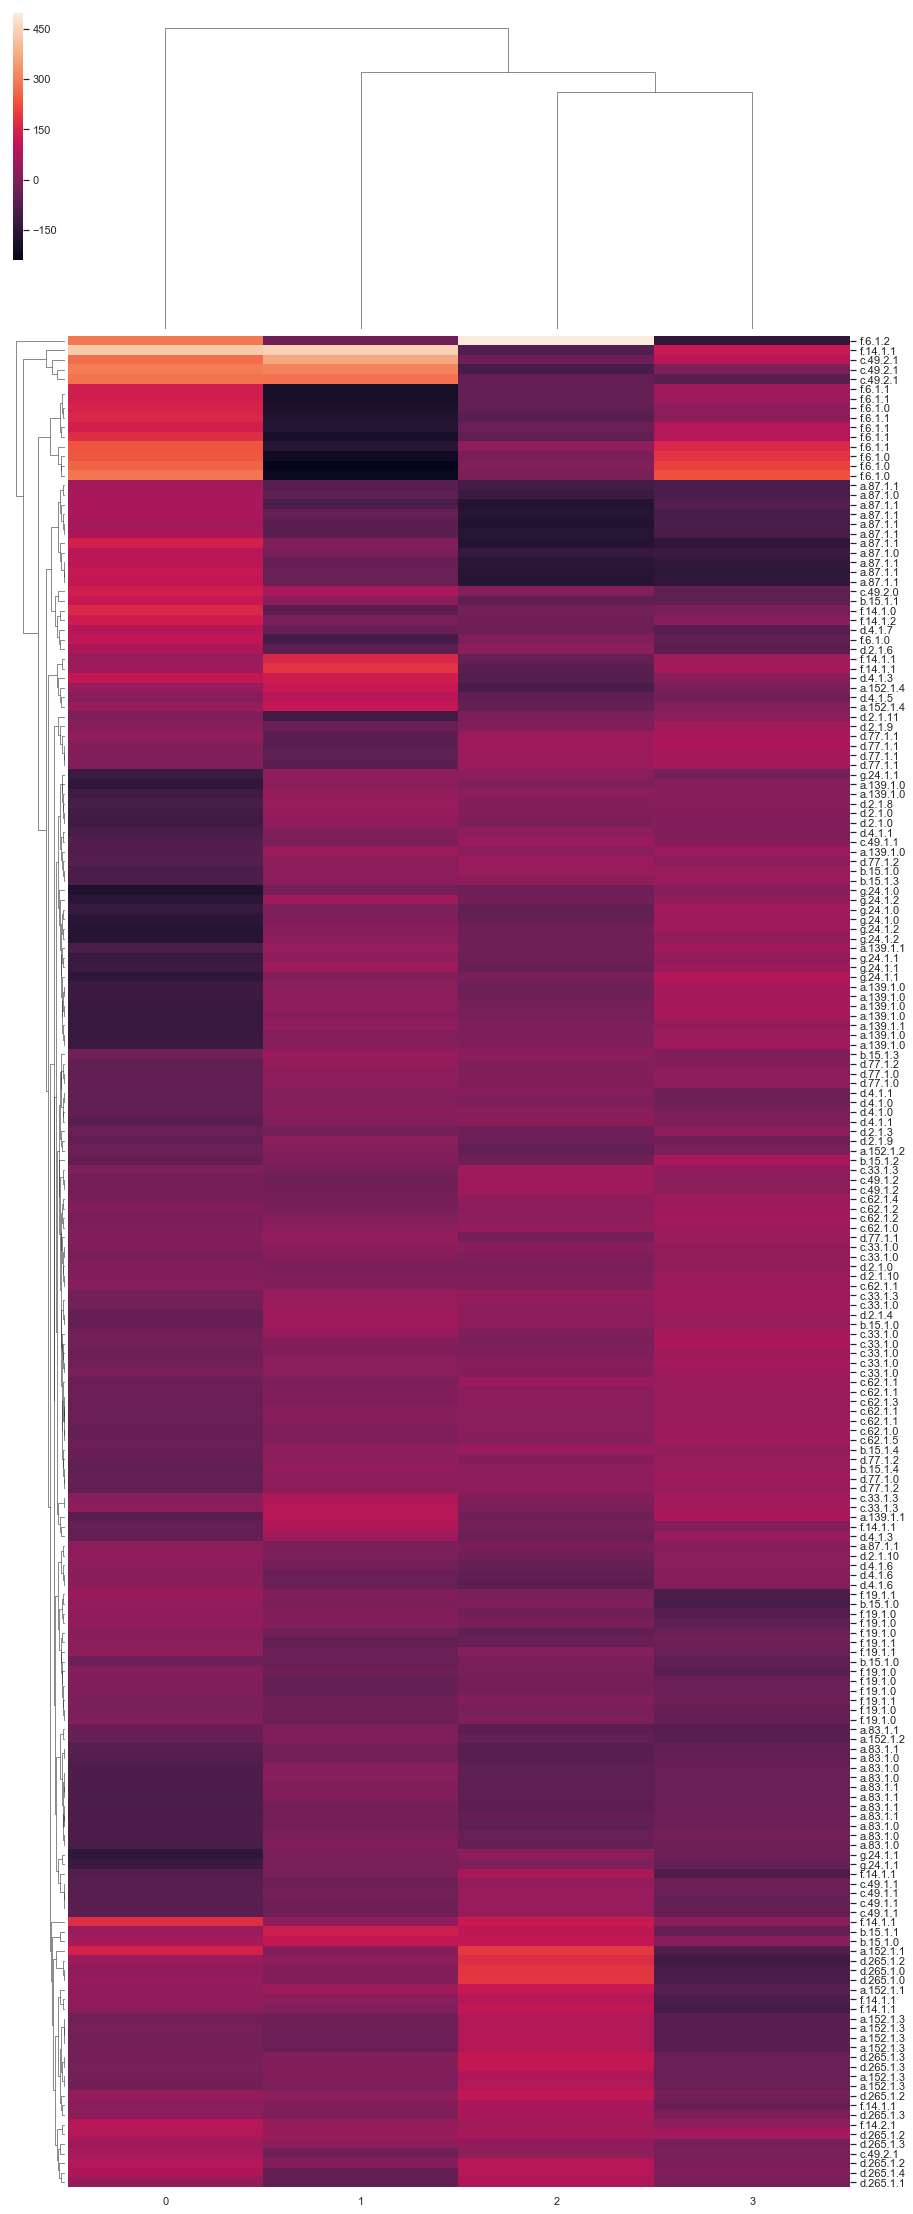

In [74]:
df = pd.DataFrame(features2d, index =y_train)
g = sns.clustermap(df, yticklabels=True, figsize=(15, 40))

## HEATMAP USING STRATEGY 2

In [83]:
matrixdict_s2 = DistanceMatrixDict(structures, resize_strategy="strategy2", resize_to=(64,64),sample_size=5)

In [84]:
len(matrixdict_s2.keys())

1019

In [85]:
X_train, y_train = [],[]

for protein,vector in matrixdict_s2.items():
    X_train.append(vector)
    p = pdb.split("sample")[0]
    label = label_dict[p]
    y_train.append(label)
protein_names = matrixdict_s1.keys()

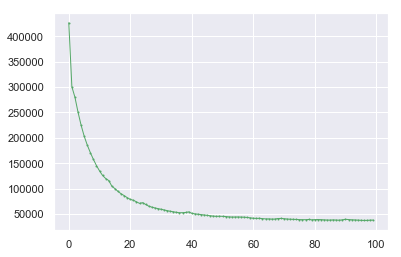

In [87]:
input_size = len(X_train_new[0])
new_features, loss = LinearAutoencoder(X_train_new, input_size, 50, 100, learning_rate=0.0001)
# LOSS GRAPH
fig, ax = plt.subplots()
ax.plot(range(0,len(loss)), loss, 'go-', linewidth=1, markersize=1)

In [89]:
df = pd.DataFrame(new_features, index =y_train_new)

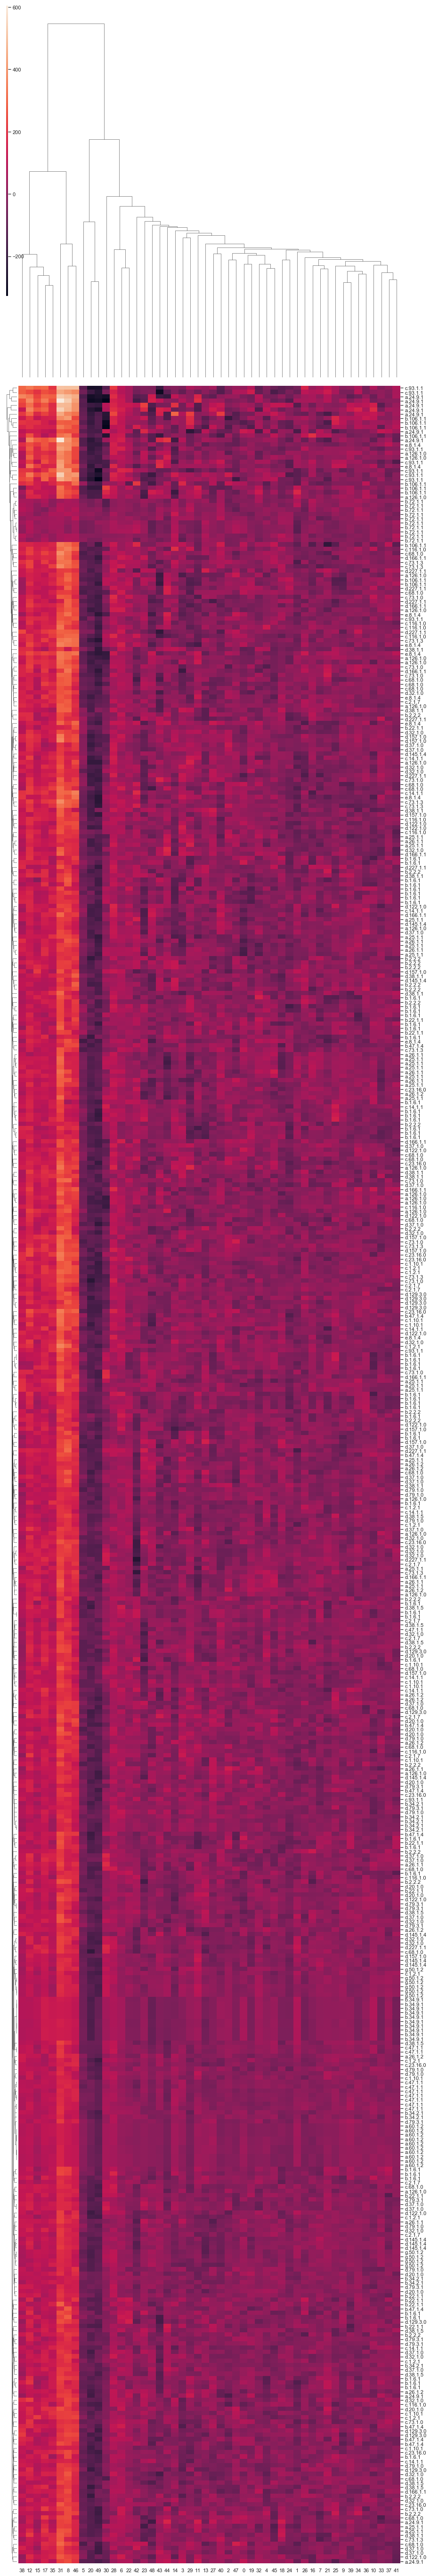

In [90]:
g = sns.clustermap(df, yticklabels=True, figsize=(15, 100))

#### PCA is used to decrease feature dimension (n=4)

In [91]:
pca = PCA(n_components=4)
features2d = pca.fit_transform(new_features)

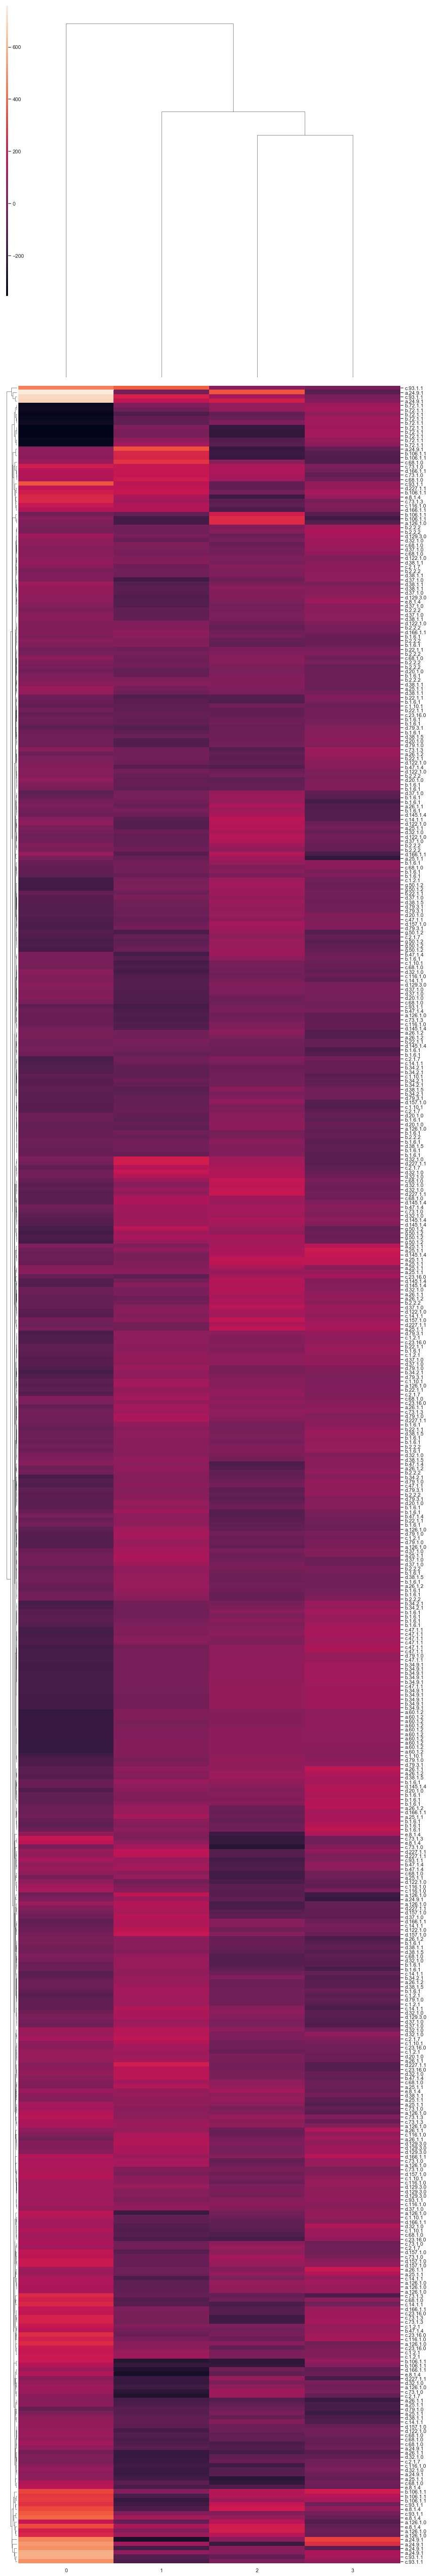

In [92]:
df = pd.DataFrame(features2d, index =y_train_new)
g = sns.clustermap(df, yticklabels=True, figsize=(15, 100))